In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

## Import

In [82]:
db_path = '../data/beer.db'

conn = sqlite3.connect(db_path)
query = "SELECT * FROM prepped_data"

df = pd.read_sql(query, conn)

In [83]:
df.drop('brewery', axis=1, inplace=True)

In [84]:
df.shape

(102598, 216)

In [85]:
df.head()

,username,beer_name,ABV,IBU,global_rating,total,beertype_Adambier,beertype_Altbier,beertype_American Wild Ale,beertype_Australian Sparkling Ale,...,beertype_Table Beer,beertype_Traditional Ale,beertype_Wheat Beer - American Pale Wheat,beertype_Wheat Beer - Other,beertype_Wheat Wine,beertype_Winter Ale,beertype_Winter Warmer,beertype_Witbier,beertype_Zoigl,user_rating
0,tnt,Society & Solitude #7,8.0,44.159369,4.38,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.25
1,tnt,Riwaka Single Hop Pale Ale,5.2,44.159369,4.14,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.00
2,tnt,"Walk, Don't Run",3.7,44.159369,4.10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.50
3,tnt,Czech Two,4.1,39.000000,3.81,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.25
4,tnt,Spirit of Revolt,8.2,52.000000,3.82,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.00


# Find Similar Users. Build Model on their Data, Test on my Data

## 1. Similarity Matrix - Impute with 0

In [86]:
piv =  pd.pivot_table(data=df, values='user_rating', index='username', columns='beer_name', 
                      aggfunc='mean', fill_value=0).reset_index()
piv.head()

beer_name,username,!Wild Blend! (Morango+Amora),"""33"" Export","""Body"" System","""British Bitter"" English Pale Ale","""Calcium"" Blood Orange","""Craft Beer"" Dark Lager Dry Hopped Oct. 2017","""Cream Soda"" Wheat IPA","""Cult of Pekko"" Hop-Scotch IPA (2017)","""K"" is for Kriek",...,分 桃 (Fēn Táo),分 桃 (Fēn Táo) (Blend 2),废都 (Two Lost Capitals),日本から来たネコ (Some Cat From Japan),日本で人気がある Big In Japan DDH IPA,木島平村 Hard Cider #39,藻細工S-IPA (mosaic S-IPA),調和,黄雪 (おうせき) - Yellow Snow,광화문 Seoulite Ale
0,AFernan25,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,AlexKress,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
2,Asier05,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,Audyoh,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
4,Boat,4,0.0,0,0.0,0.0,0.0,0,0.0,0.0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [87]:
X = piv[piv['username'] == 'tsharp93'].drop('username', axis=1)
Y = piv[piv['username'] != 'tsharp93'].drop('username', axis=1)
Y.head()

beer_name,!Wild Blend! (Morango+Amora),"""33"" Export","""Body"" System","""British Bitter"" English Pale Ale","""Calcium"" Blood Orange","""Craft Beer"" Dark Lager Dry Hopped Oct. 2017","""Cream Soda"" Wheat IPA","""Cult of Pekko"" Hop-Scotch IPA (2017)","""K"" is for Kriek","""Not Just Some"" Oatmeal Stout",...,分 桃 (Fēn Táo),分 桃 (Fēn Táo) (Blend 2),废都 (Two Lost Capitals),日本から来たネコ (Some Cat From Japan),日本で人気がある Big In Japan DDH IPA,木島平村 Hard Cider #39,藻細工S-IPA (mosaic S-IPA),調和,黄雪 (おうせき) - Yellow Snow,광화문 Seoulite Ale
0,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [88]:
X.head()

beer_name,!Wild Blend! (Morango+Amora),"""33"" Export","""Body"" System","""British Bitter"" English Pale Ale","""Calcium"" Blood Orange","""Craft Beer"" Dark Lager Dry Hopped Oct. 2017","""Cream Soda"" Wheat IPA","""Cult of Pekko"" Hop-Scotch IPA (2017)","""K"" is for Kriek","""Not Just Some"" Oatmeal Stout",...,分 桃 (Fēn Táo),分 桃 (Fēn Táo) (Blend 2),废都 (Two Lost Capitals),日本から来たネコ (Some Cat From Japan),日本で人気がある Big In Japan DDH IPA,木島平村 Hard Cider #39,藻細工S-IPA (mosaic S-IPA),調和,黄雪 (おうせき) - Yellow Snow,광화문 Seoulite Ale
123,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [89]:
from sklearn.metrics.pairwise import cosine_similarity

In [90]:
sim = cosine_similarity(X,Y)[0].tolist()
names = piv[piv['username'] != 'tsharp93']['username']

sim_df = pd.DataFrame({'username':names, 'sim_score':sim})
sim_df.sort_values(by='sim_score', ascending=False).head()

,username,sim_score
109,r4ymond,0.059821
0,AFernan25,0.052646
14,FernandoRamirez,0.049640
102,mikeyjimenez,0.048353
78,dreadedrockstar,0.042560


## Scale

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
X_scaler = StandardScaler()
Y_scaler = StandardScaler()

In [93]:
X_scaler.fit(df[['ABV', 'IBU', 'global_rating']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [94]:
df[['ABV', 'IBU', 'global_rating']] = X_scaler.transform(df[['ABV', 'IBU', 'global_rating']])

In [95]:
Y_scaler.fit(np.array(df['user_rating']).reshape(-1,1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [96]:
df['user_rating'] = Y_scaler.transform(np.array(df['user_rating']).reshape(-1,1))

In [97]:
df.head()

,username,beer_name,ABV,IBU,global_rating,total,beertype_Adambier,beertype_Altbier,beertype_American Wild Ale,beertype_Australian Sparkling Ale,...,beertype_Table Beer,beertype_Traditional Ale,beertype_Wheat Beer - American Pale Wheat,beertype_Wheat Beer - Other,beertype_Wheat Wine,beertype_Winter Ale,beertype_Winter Warmer,beertype_Witbier,beertype_Zoigl,user_rating
0,tnt,Society & Solitude #7,0.550358,6.455356e-16,1.362734,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.844092
1,tnt,Riwaka Single Hop Pale Ale,-0.649155,6.455356e-16,0.905142,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.027187
2,tnt,"Walk, Don't Run",-1.291751,6.455356e-16,0.828877,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.238457
3,tnt,Czech Two,-1.120392,-2.343671e-01,0.275954,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.844092
4,tnt,Spirit of Revolt,0.636038,3.561648e-01,0.295020,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.449727


### Lasso

In [98]:
rand_state = 10
n_users_list = [5,6,7,8,9,10]

mae_list = []
quarter_abs_error_list = []
half_abs_error_list = []
for n in n_users_list:

    # get data for top n users similar to selected user
    top_n = list(sim_df.sort_values('sim_score', ascending=False)[0:n]['username'])
    top_n_df = df[df['username'].isin(top_n)]

    # exclude rows where user/global rating is not available
    top_n_df = top_n_df[~top_n_df['user_rating'].isna()]
    top_n_df = top_n_df[~top_n_df['global_rating'].isna()]

    # split data
    X_train = top_n_df.drop(['username', 'beer_name', 'user_rating'],axis=1)
    y_train = top_n_df['user_rating']
    
    X_test = df[df['username'] == 'tsharp93'].drop(['username', 'beer_name', 'user_rating'], axis=1)
    y_test = df[df['username'] == 'tsharp93']['user_rating']

    # Train model
    from sklearn.linear_model import LassoCV
    model = LassoCV(fit_intercept=False, normalize=False, cv=5, random_state=rand_state)
    model.fit(X_train, y_train)

    # Evaluate model on user's data 
    preds = model.predict(X_test)
    
    # unscale
    preds_unscaled = Y_scaler.inverse_transform(preds)
    y_test_unscaled = Y_scaler.inverse_transform(y_test)

    # evaluate results
    results_df = pd.DataFrame([preds_unscaled, y_test_unscaled]).transpose()
    results_df.columns = ['predicted', 'actual']
    results_df['error'] = results_df['predicted'] - results_df['actual']
    results_df['abs_error'] = abs(results_df['error'])

    # Performance Metrics 
    mae = np.mean(results_df['abs_error'])
    print('MAE =', mae, "for n =", n)
    
    quarter_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
    half_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))
    mae_list.append(mae)

MAE = 0.3629265053125323 for n = 5
MAE = 0.3886965322984313 for n = 6
MAE = 0.36727501217098835 for n = 7
MAE = 0.37405774808965386 for n = 8
MAE = 0.3760239579229238 for n = 9
MAE = 0.3759773957569924 for n = 10


In [101]:
top_n_df.head()

,username,beer_name,ABV,IBU,global_rating,total,beertype_Adambier,beertype_Altbier,beertype_American Wild Ale,beertype_Australian Sparkling Ale,...,beertype_Table Beer,beertype_Traditional Ale,beertype_Wheat Beer - American Pale Wheat,beertype_Wheat Beer - Other,beertype_Wheat Wine,beertype_Winter Ale,beertype_Winter Warmer,beertype_Witbier,beertype_Zoigl,user_rating
12812,Florindobucci,Krusher IPA,-0.092238,1.037548,-0.543899,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.055362
12813,Florindobucci,Hell or High Watermelon,-0.777674,-1.233729,-0.296036,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.916463
12814,Florindobucci,Trifecta IPA,0.079121,1.900633,0.123423,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.339003
12815,Florindobucci,Breaking Bud,-0.092238,0.265314,0.466617,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.733368
12816,Florindobucci,Head Hunter IPA,0.336160,1.946058,0.581015,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.339003


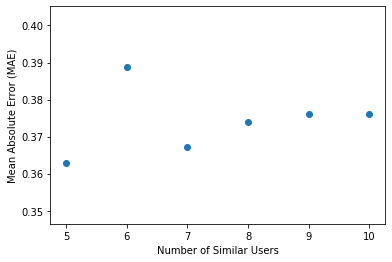

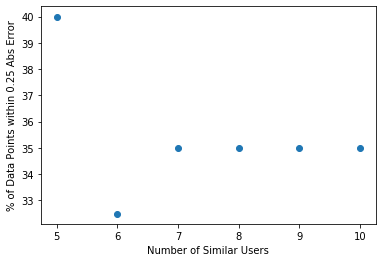

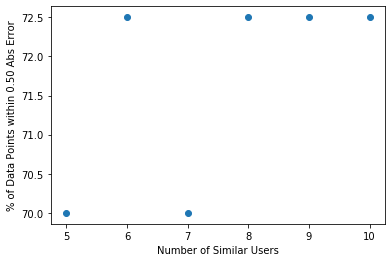

In [102]:
plt.scatter(n_users_list, mae_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

plt.scatter(n_users_list, quarter_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.25 Abs Error')
plt.show()

plt.scatter(n_users_list, half_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.50 Abs Error')
plt.show()

### ElasticNet

In [103]:
rand_state = 10
n_users_list = [5,6,7,8,9,10]

mae_list = []
quarter_abs_error_list = []
half_abs_error_list = []
for n in n_users_list:

    # get data for top n users similar to selected user
    top_n = list(sim_df.sort_values('sim_score', ascending=False)[0:n]['username'])
    top_n_df = df[df['username'].isin(top_n)]

    # exclude rows where user/global rating is not available
    top_n_df = top_n_df[~top_n_df['user_rating'].isna()]
    top_n_df = top_n_df[~top_n_df['global_rating'].isna()]

    # split data
    x = top_n_df.drop(['username', 'beer_name', 'user_rating'],axis=1)
    y = top_n_df['user_rating']
    # from sklearn.model_selection import train_test_split
    # X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rand_state)
    X_test = df[df['username'] == 'tsharp93'].drop(['username', 'beer_name', 'user_rating'], axis=1)
    y_test = df[df['username'] == 'tsharp93']['user_rating']

    # Train model
    from sklearn.linear_model import ElasticNetCV
    model = ElasticNetCV(fit_intercept=False, normalize=False, cv=5, random_state=rand_state)
    model.fit(x, y)

    # Evaluate model on user's data 
    preds = model.predict(X_test)
    
    # unscale
    preds_unscaled = Y_scaler.inverse_transform(preds)
    y_test_unscaled = Y_scaler.inverse_transform(y_test)

    # evaluate results
    results_df = pd.DataFrame([preds_unscaled, y_test_unscaled]).transpose()
    results_df.columns = ['predicted', 'actual']
    results_df['error'] = results_df['predicted'] - results_df['actual']
    results_df['abs_error'] = abs(results_df['error'])

    # Performance Metrics 
    mae = np.mean(results_df['abs_error'])
    print('MAE =', mae, "for n =", n)
    
    quarter_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
    half_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))
    mae_list.append(mae)

MAE = 0.3625150438450672 for n = 5
MAE = 0.4007440010969468 for n = 6
MAE = 0.36428370629832635 for n = 7
MAE = 0.3723881945695085 for n = 8
MAE = 0.37567591498233655 for n = 9
MAE = 0.37653280969441094 for n = 10


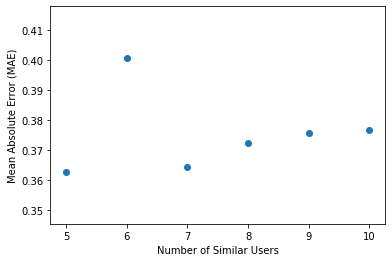

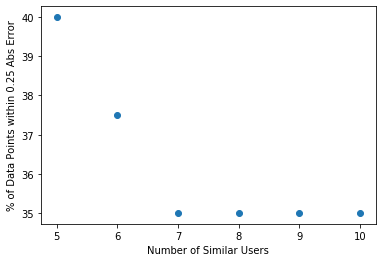

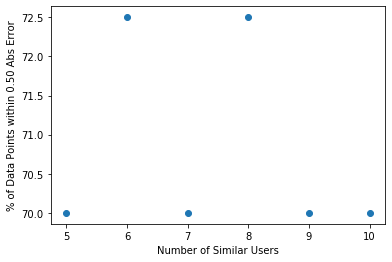

In [104]:
plt.scatter(n_users_list, mae_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

plt.scatter(n_users_list, quarter_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.25 Abs Error')
plt.show()

plt.scatter(n_users_list, half_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.50 Abs Error')
plt.show()

### SVR, C = 0.5

In [105]:
rand_state = 10
n_users_list = [5,6,7,8,9,10]
# n_users_list = [5]

mae_list = []
quarter_abs_error_list = []
half_abs_error_list = []
for n in n_users_list:

    # get data for top n users similar to selected user
    top_n = list(sim_df.sort_values('sim_score', ascending=False)[0:n]['username'])
    top_n_df = df[df['username'].isin(top_n)]

    # exclude rows where user/global rating is not available
    top_n_df = top_n_df[~top_n_df['user_rating'].isna()]
    top_n_df = top_n_df[~top_n_df['global_rating'].isna()]

    # split data
    x = top_n_df.drop(['username', 'beer_name', 'user_rating'],axis=1)
    y = top_n_df['user_rating']
    # from sklearn.model_selection import train_test_split
    # X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rand_state)
    X_test = df[df['username'] == 'tsharp93'].drop(['username', 'beer_name', 'user_rating'], axis=1)
    y_test = df[df['username'] == 'tsharp93']['user_rating']

    # Train model
    from sklearn.svm import SVR
    
    for C in[0.5]:
        model = SVR(kernel='linear', epsilon=0.25, C=C)
        model.fit(x, y)

        # Evaluate model on user's data 
        preds = model.predict(X_test)

        # unscale
        preds_unscaled = Y_scaler.inverse_transform(preds)
        y_test_unscaled = Y_scaler.inverse_transform(y_test)

        # evaluate results
        results_df = pd.DataFrame([preds_unscaled, y_test_unscaled]).transpose()
        results_df.columns = ['predicted', 'actual']
        results_df['error'] = results_df['predicted'] - results_df['actual']
        results_df['abs_error'] = abs(results_df['error'])

        # Performance Metrics 
        mae = np.mean(results_df['abs_error'])
        print('MAE =', mae, "for n =", n)

        quarter_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
        half_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))
        mae_list.append(mae)

MAE = 0.36528914956658465 for n = 5
MAE = 0.39840762323743273 for n = 6
MAE = 0.365023612870256 for n = 7
MAE = 0.37190274456351397 for n = 8
MAE = 0.37776764732617035 for n = 9
MAE = 0.3773941100438785 for n = 10


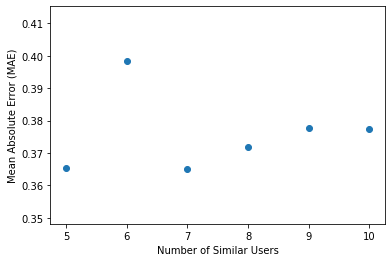

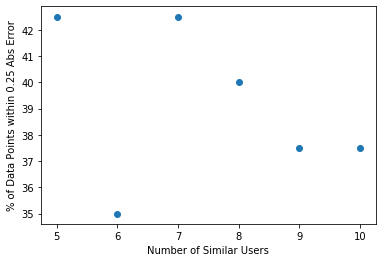

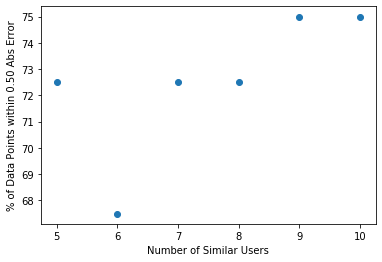

In [106]:
plt.scatter(n_users_list, mae_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

plt.scatter(n_users_list, quarter_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.25 Abs Error')
plt.show()

plt.scatter(n_users_list, half_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.50 Abs Error')
plt.show()

### SVR, vary C

In [107]:
rand_state = 10
n_users_list = [5,6,7,8,9,10]
c_list = [0.1, 1.0, 10.0]

mae_list = []
quarter_abs_error_list = []
half_abs_error_list = []
for n in n_users_list:

    # get data for top n users similar to selected user
    top_n = list(sim_df.sort_values('sim_score', ascending=False)[0:n]['username'])
    top_n_df = df[df['username'].isin(top_n)]

    # exclude rows where user/global rating is not available
    top_n_df = top_n_df[~top_n_df['user_rating'].isna()]
    top_n_df = top_n_df[~top_n_df['global_rating'].isna()]

    # split data
    x = top_n_df.drop(['username', 'beer_name', 'user_rating'],axis=1)
    y = top_n_df['user_rating']
    # from sklearn.model_selection import train_test_split
    # X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rand_state)
    X_test = df[df['username'] == 'tsharp93'].drop(['username', 'beer_name', 'user_rating'], axis=1)
    y_test = df[df['username'] == 'tsharp93']['user_rating']

    # Train model
    from sklearn.svm import SVR
    
    for C in c_list:
        model = SVR(kernel='linear', epsilon=0.25, C=C)
        model.fit(x, y)

        # Evaluate model on user's data 
        preds = model.predict(X_test)

        # unscale
        preds_unscaled = Y_scaler.inverse_transform(preds)
        y_test_unscaled = Y_scaler.inverse_transform(y_test)

        # evaluate results
        results_df = pd.DataFrame([preds_unscaled, y_test_unscaled]).transpose()
        results_df.columns = ['predicted', 'actual']
        results_df['error'] = results_df['predicted'] - results_df['actual']
        results_df['abs_error'] = abs(results_df['error'])

        # Performance Metrics 
        mae = np.mean(results_df['abs_error'])
        print('MAE =', mae, "for n =", n)

        quarter_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
        half_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))
        mae_list.append(mae)

MAE = 0.36240224350886063 for n = 5
MAE = 0.3776651630916692 for n = 5
MAE = 0.375893901231085 for n = 5
MAE = 0.3931656430583548 for n = 6
MAE = 0.398511429379144 for n = 6
MAE = 0.39887565807379477 for n = 6
MAE = 0.3602247849753709 for n = 7
MAE = 0.36630067201738437 for n = 7
MAE = 0.36653549755244025 for n = 7
MAE = 0.3579201620838185 for n = 8
MAE = 0.37198698986535766 for n = 8
MAE = 0.37077039738482076 for n = 8
MAE = 0.36606880643109807 for n = 9
MAE = 0.3774872753416876 for n = 9
MAE = 0.37664150868799806 for n = 9
MAE = 0.36605454631243994 for n = 10
MAE = 0.37708725712956265 for n = 10
MAE = 0.37650407258043056 for n = 10


In [108]:
len(mae_list)

18

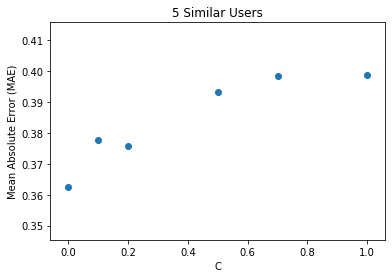

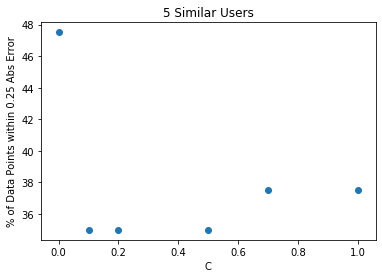

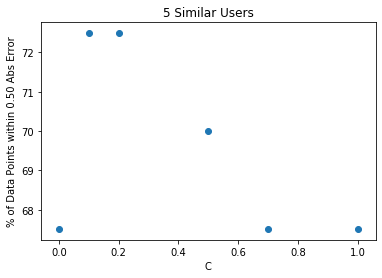

In [109]:
x = [0.1, 1.0, 10.0]
start = 0
end = start + 6

plt.scatter(x, mae_list[start:end])
plt.title(str(int(5 + start/6)) + ' Similar Users')
plt.xlabel('C')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

plt.scatter(x, quarter_abs_error_list[start:end])
plt.title(str(int(5 + start/6)) + ' Similar Users')
plt.xlabel('C')
plt.ylabel('% of Data Points within 0.25 Abs Error')
plt.show()

plt.scatter(x, half_abs_error_list[start:end])
plt.title(str(int(5 + start/6)) + ' Similar Users')
plt.xlabel('C')
plt.ylabel('% of Data Points within 0.50 Abs Error')
plt.show()

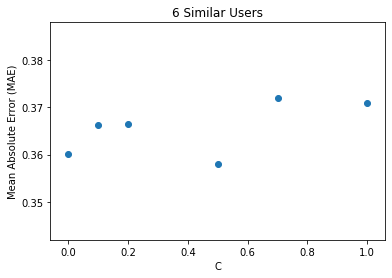

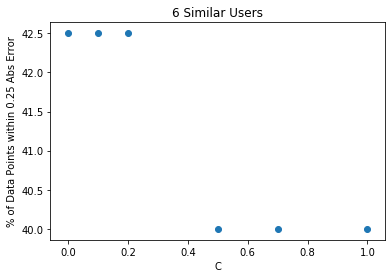

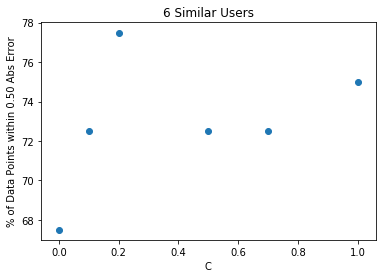

In [110]:
x = [0.0001, 0.1, 0.2, 0.5, 0.7, 1.0]
start = 6
end = start + 6

plt.scatter(x, mae_list[start:end])
plt.title(str(int(5 + start/6)) + ' Similar Users')
plt.xlabel('C')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

plt.scatter(x, quarter_abs_error_list[start:end])
plt.title(str(int(5 + start/6)) + ' Similar Users')
plt.xlabel('C')
plt.ylabel('% of Data Points within 0.25 Abs Error')
plt.show()

plt.scatter(x, half_abs_error_list[start:end])
plt.title(str(int(5 + start/6)) + ' Similar Users')
plt.xlabel('C')
plt.ylabel('% of Data Points within 0.50 Abs Error')
plt.show()

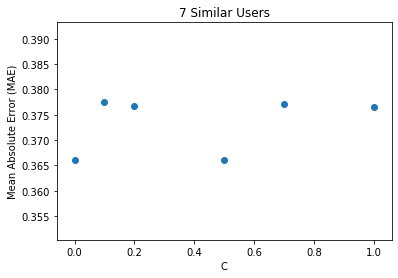

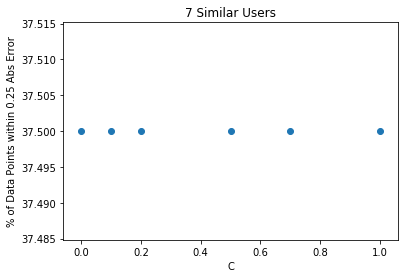

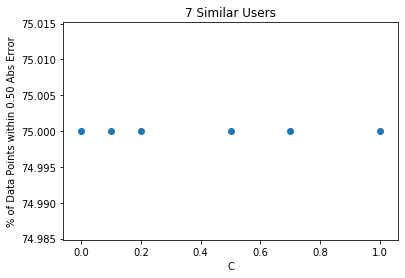

In [111]:
x = [0.0001, 0.1, 0.2, 0.5, 0.7, 1.0]
start = 12
end = start + 6

plt.scatter(x, mae_list[start:end])
plt.title(str(int(5 + start/6)) + ' Similar Users')
plt.xlabel('C')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

plt.scatter(x, quarter_abs_error_list[start:end])
plt.title(str(int(5 + start/6)) + ' Similar Users')
plt.xlabel('C')
plt.ylabel('% of Data Points within 0.25 Abs Error')
plt.show()

plt.scatter(x, half_abs_error_list[start:end])
plt.title(str(int(5 + start/6)) + ' Similar Users')
plt.xlabel('C')
plt.ylabel('% of Data Points within 0.50 Abs Error')
plt.show()

ValueError: x and y must be the same size

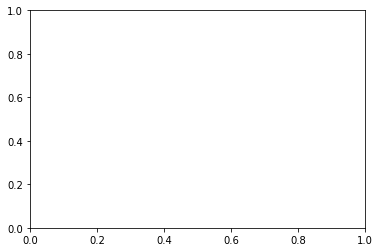

In [112]:
x = [0.0001, 0.1, 0.2, 0.5, 0.7, 1.0]
start = 18
end = start + 6

plt.scatter(x, mae_list[start:end])
plt.title(str(int(5 + start/6)) + ' Similar Users')
plt.xlabel('C')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

plt.scatter(x, quarter_abs_error_list[start:end])
plt.title(str(int(5 + start/6)) + ' Similar Users')
plt.xlabel('C')
plt.ylabel('% of Data Points within 0.25 Abs Error')
plt.show()

plt.scatter(x, half_abs_error_list[start:end])
plt.title(str(int(5 + start/6)) + ' Similar Users')
plt.xlabel('C')
plt.ylabel('% of Data Points within 0.50 Abs Error')
plt.show()

## 2. Change Imputation Method on Filling Similarity Matrix - Use Beer (Col) Mean

In [ ]:
piv =  pd.pivot_table(data=df, values='user_rating', index='username', columns='beer_name', 
                      aggfunc='mean').reset_index()
piv.head()

In [ ]:
piv = piv.fillna(piv.mean())
piv.head()

In [ ]:
X = piv[piv['username'] == 'tsharp93'].drop('username', axis=1)
Y = piv[piv['username'] != 'tsharp93'].drop('username', axis=1)
Y.head()

In [ ]:
sim = cosine_similarity(X,Y)[0].tolist()
names = piv[piv['username'] != 'tsharp93']['username']

sim_df = pd.DataFrame({'username':names, 'sim_score':sim})
sim_df.sort_values(by='sim_score', ascending=False).head()

#### Scale

In [ ]:
X_scaler.fit(df[['ABV', 'IBU', 'global_rating']])

In [ ]:
df[['ABV', 'IBU', 'global_rating']] = X_scaler.transform(df[['ABV', 'IBU', 'global_rating']])

In [ ]:
Y_scaler.fit(np.array(df['user_rating']).reshape(-1,1))

In [ ]:
df['user_rating'] = Y_scaler.transform(np.array(df['user_rating']).reshape(-1,1))

In [ ]:
df.head()

### Lasso

In [ ]:
rand_state = 10
n_users_list = [5,6,7,8,9,10]

mae_list = []
quarter_abs_error_list = []
half_abs_error_list = []
for n in n_users_list:

    # get data for top n users similar to selected user
    top_n = list(sim_df.sort_values('sim_score', ascending=False)[0:n]['username'])
    top_n_df = df[df['username'].isin(top_n)]

    # exclude rows where user/global rating is not available
    top_n_df = top_n_df[~top_n_df['user_rating'].isna()]
    top_n_df = top_n_df[~top_n_df['global_rating'].isna()]

    # split data
    x = top_n_df.drop(['username', 'beer_name', 'user_rating'],axis=1)
    y = top_n_df['user_rating']
    # from sklearn.model_selection import train_test_split
    # X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rand_state)
    X_test = df[df['username'] == 'tsharp93'].drop(['username', 'beer_name', 'user_rating'], axis=1)
    y_test = df[df['username'] == 'tsharp93']['user_rating']

    # Train model
    from sklearn.linear_model import LassoCV
    model = LassoCV(fit_intercept=False, normalize=False, cv=5, random_state=rand_state)
    model.fit(x, y)

    # Evaluate model on user's data 
    preds = model.predict(X_test)
    
    # unscale
    preds_unscaled = Y_scaler.inverse_transform(preds)
    y_test_unscaled = Y_scaler.inverse_transform(y_test)

    # evaluate results
    results_df = pd.DataFrame([preds_unscaled, y_test_unscaled]).transpose()
    results_df.columns = ['predicted', 'actual']
    results_df['error'] = results_df['predicted'] - results_df['actual']
    results_df['abs_error'] = abs(results_df['error'])

    # Performance Metrics 
    mae = np.mean(results_df['abs_error'])
    print('MAE =', mae, "for n =", n)
    
    quarter_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
    half_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))
    mae_list.append(mae)

In [ ]:
plt.scatter(n_users_list, mae_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

plt.scatter(n_users_list, quarter_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.25 Abs Error')
plt.show()

plt.scatter(n_users_list, half_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.50 Abs Error')
plt.show()

### ElasticNet

In [ ]:
rand_state = 10
n_users_list = [5,6,7,8,9,10]

mae_list = []
quarter_abs_error_list = []
half_abs_error_list = []
for n in n_users_list:

    # get data for top n users similar to selected user
    top_n = list(sim_df.sort_values('sim_score', ascending=False)[0:n]['username'])
    top_n_df = df[df['username'].isin(top_n)]

    # exclude rows where user/global rating is not available
    top_n_df = top_n_df[~top_n_df['user_rating'].isna()]
    top_n_df = top_n_df[~top_n_df['global_rating'].isna()]

    # split data
    x = top_n_df.drop(['username', 'beer_name', 'user_rating'],axis=1)
    y = top_n_df['user_rating']
    # from sklearn.model_selection import train_test_split
    # X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rand_state)
    X_test = df[df['username'] == 'tsharp93'].drop(['username', 'beer_name', 'user_rating'], axis=1)
    y_test = df[df['username'] == 'tsharp93']['user_rating']

    # Train model
    from sklearn.linear_model import ElasticNetCV
    model = ElasticNetCV(fit_intercept=False, normalize=False, cv=5, random_state=rand_state)
    model.fit(x, y)

    # Evaluate model on user's data 
    preds = model.predict(X_test)
    
    # unscale
    preds_unscaled = Y_scaler.inverse_transform(preds)
    y_test_unscaled = Y_scaler.inverse_transform(y_test)

    # evaluate results
    results_df = pd.DataFrame([preds_unscaled, y_test_unscaled]).transpose()
    results_df.columns = ['predicted', 'actual']
    results_df['error'] = results_df['predicted'] - results_df['actual']
    results_df['abs_error'] = abs(results_df['error'])

    # Performance Metrics 
    mae = np.mean(results_df['abs_error'])
    print('MAE =', mae, "for n =", n)
    
    quarter_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
    half_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))
    mae_list.append(mae)

In [ ]:
plt.scatter(n_users_list, mae_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

plt.scatter(n_users_list, quarter_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.25 Abs Error')
plt.show()

plt.scatter(n_users_list, half_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.50 Abs Error')
plt.show()